**1. Business Problem:**

A banking institution hired a marketing firm to contact potential customers and gauge their interest in purchasing certificates of deposit (CDs), which are a type of fixed-term investment. The objective of this exploratory data analysis is to answer the following question: What is the profile of customers with the greatest potential for conversion?

**2. Load the Dataset**

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from typing_extensions import dataclass_transform
#Load .csv file
#data = pd.read_csv('/content/dataset.csv', encoding='latin1')

#Load dataset from GitHub
url= 'https://raw.githubusercontent.com/bcnataly/data-analyst-portfolio-nataly/main/1_Project_Python/dataset.csv'
data = pd.read_csv(url)


**3. Initial Exploratorion**

In [ ]:
#Print the number of rows and columns
print(f'DataFrame size: {data.shape} \n')

DataFrame size: (45215, 17) 



In [ ]:
#Display the first 5 rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
#Number of non-null values and data type for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


**4. Data Cleaning**

**4.1 Management of missing values**








*  **Remove all rows with missing values from the original dataframe (data), then store a clean copy in bank_data**

In [ ]:
print (f'Dataframe size before removing missing values: {data.shape}')

#Drop rows with missing values and store a copy in bank_data.
bank_data = data.dropna().copy()

print (f'Dataset size after removing missing values: {bank_data.shape}\n')

# Verify that all columns have the same number of rows.
bank_data.info()

Dataframe size before removing missing values: (45215, 17)
Dataset size after removing missing values: (45207, 17)

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), 

**4.2 Unnecessary columns**


*   **Remove any categorical columns that with only one level**

In [ ]:
# Count the number of unique levels in each categorical column.
categorical_columns =['job','marital','education','default','housing','loan','contact','month','poutcome','y']

for column in categorical_columns:
  print(f'{column}: {bank_data[column].nunique()} subcategories')

job: 18 subcategories
marital: 6 subcategories
education: 10 subcategories
default: 2 subcategories
housing: 2 subcategories
loan: 6 subcategories
contact: 5 subcategories
month: 12 subcategories
poutcome: 6 subcategories
y: 2 subcategories


Observation:



*   Each categorical column contains more than one subcategory. There is no need to discard any of them.





*   **Discard any numerical columns that contain only one unique value**


In [ ]:
#Check the numerical columns
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observation:



*   The fact that the standard deviation of each variable is not equal to zero indicates that each column contains different numerical values. Therefore, all numerical columns are preserved.









**4.3 Duplicate rows**

In [ ]:
print (f'DataFrame size before removing duplicate rows: {bank_data.shape}')

# Drop the duplicate rows
bank_data.drop_duplicates(inplace=True)

print (f'DataFrame size after removing duplicate rows: {bank_data.shape}\n')

DataFrame size before removing duplicate rows: (45207, 17)
DataFrame size after removing duplicate rows: (45203, 17)



**4.4 Outlier detection in numerical variables**

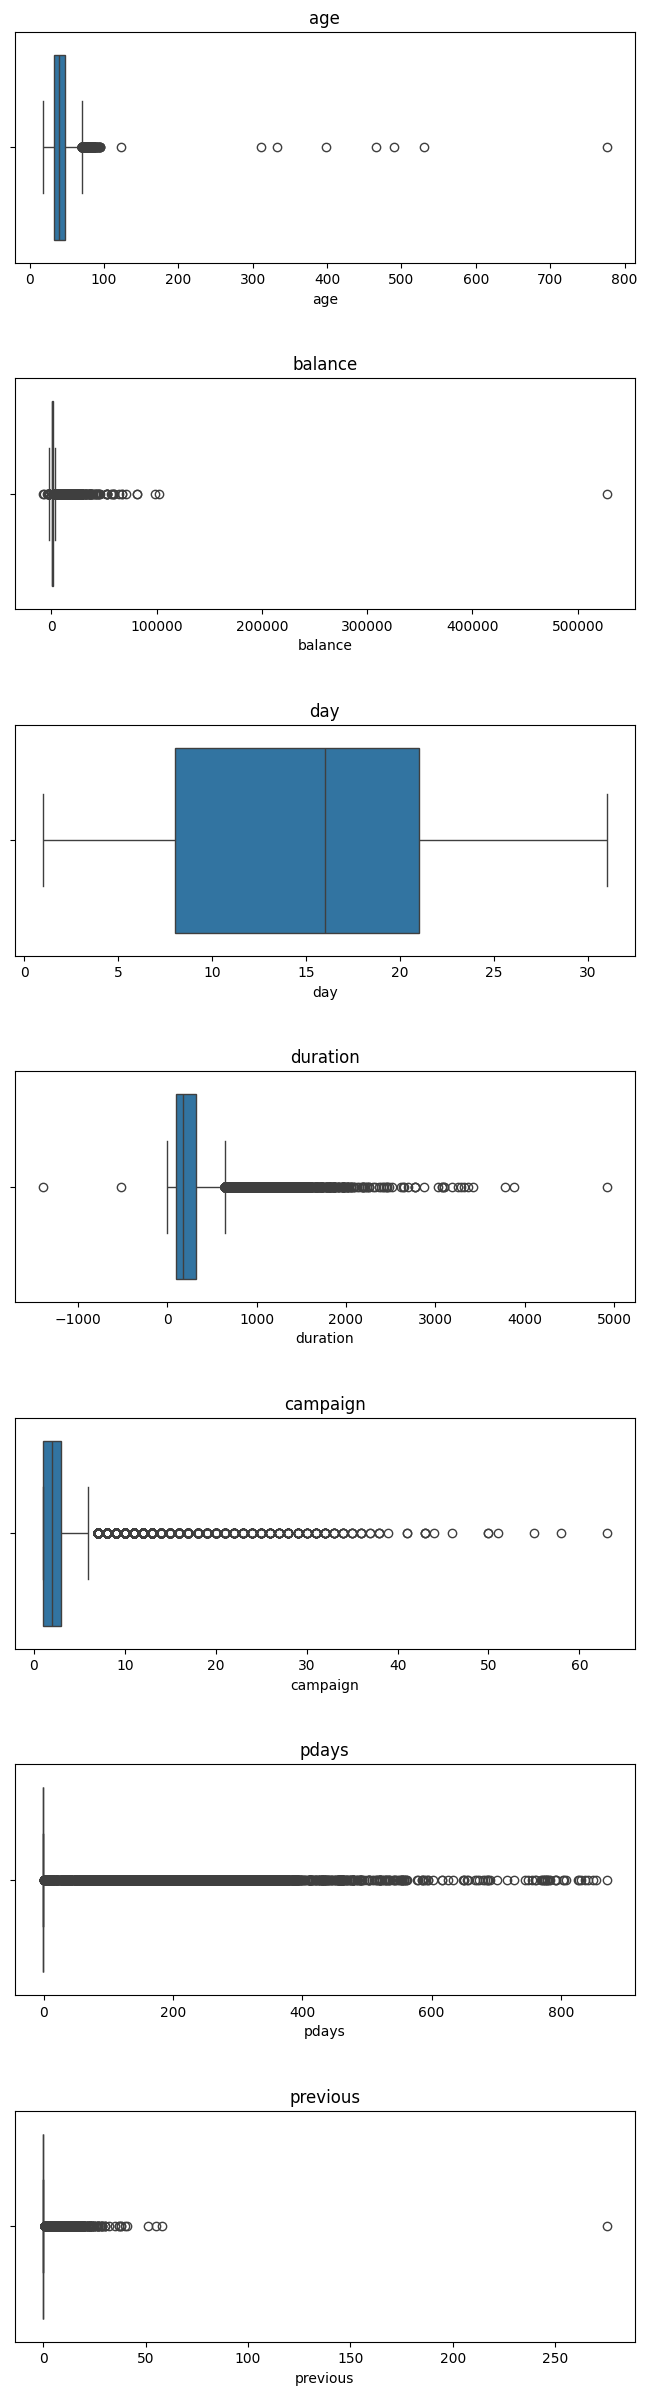

In [ ]:
#  Define the list, numerical_columns, containing the numeric variables from bank_data.
numerical_columns =['age','balance', 'day','duration','campaign','pdays','previous']

# Create a figure with 3 vertically stacked subplots and set the overall figure size
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))

# Adjust vertical spacing between subplots to prevent overlap
fig.subplots_adjust(hspace=0.5)

# Loop through each numerical column, plotting a boxplot in the corresponding subplot.
for i, column in enumerate(numerical_columns):
  sns.boxplot(x=column, data=bank_data, ax= ax[i])
  ax[i].set_title(column)

Observations:

*   Age: There are potential customers much older than 100 years.
*   Balance: There is an extremely high value, close to 500,000. This value won't removed because it is normal for a customer to have a balance greater than 500,000.
*   Duration: There are negative values.
*   Previous: There is an extremely high value close to 300.





In [ ]:
print(f"DataFrame size before removing rows with 'age' > 100: {bank_data.shape}")

# Remove rows with 'age' > 100
bank_data=bank_data[bank_data['age']<=100]

print(f"DataFrame size after removing rows with 'age' > 100: {bank_data.shape}")

DataFrame size before removing rows with 'age' > 100: (45203, 17)
DataFrame size after removing rows with 'age' > 100: (45195, 17)


In [ ]:
print(f"DataFrame size before removing rows with 'duration' <= 0: {bank_data.shape}")

# Remove rows with 'duration' <= 0
bank_data=bank_data[bank_data['duration']>0]

print(f"DataFrame size after removing rows with 'duration' <= 0: {bank_data.shape}")

DataFrame size before removing rows with 'duration' <= 0: (45195, 17)
DataFrame size after removing rows with 'duration' <= 0: (45190, 17)


In [ ]:
print(f"DataFrame size before removing rows with 'previous' > 100: {bank_data.shape}")

# Remove rows with 'previous' > 100
bank_data=bank_data[bank_data['previous']<=100]

print(f"DataFrame size after removing rows with 'previous' > 100: {bank_data.shape}")

DataFrame size before removing rows with 'previous' > 100: (45190, 17)
DataFrame size after removing rows with 'previous' > 100: (45189, 17)


**4.5 Typographical errors in categorical columns**



*   **Show the number and names of the unique values in the categorical columns before correcting the typographical errors**








In [ ]:
# Create a dictionary to store unique values for each categorical column
unique_values ={column: bank_data[column].unique() for column in bank_data if column in categorical_columns}

# Iterate through the dictionary and print summary information for each column
for column, values in unique_values.items():
  print(f'Column: {column}')  # Display the column name
  print(f'Number of unique values: {len(values)}')  # Show how many unique values exist
  print(f'unique values: {values}') # List all unique values in the column
  print(f'{"-" * 90} \n') # Print a separator line for readability

Column: job
Number of unique values: 18
unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'Management' 'retired' 'admin.' 'services' 'self-employed' 'MANAGEMENT'
 'Self-employed' 'unemployed' 'housemaid' 'student' 'Services' 'Retired'
 'administrative']
------------------------------------------------------------------------------------------ 

Column: marital
Number of unique values: 6
unique values: ['married' 'single' 'div.' 'divorced' 'DIVORCED' 'Single']
------------------------------------------------------------------------------------------ 

Column: education
Number of unique values: 10
unique values: ['tertiary' 'secondary' 'unknown' 'primary' 'SECONDARY' 'Secondary'
 'Primary' 'sec.' 'Tertiary' 'UNK']
------------------------------------------------------------------------------------------ 

Column: default
Number of unique values: 2
unique values: ['no' 'yes']
----------------------------------------------------------------------------------



* **Convert all subcategories of categorical columns to lowercase**

In [ ]:
# Convert all subcategories to lowercase
for column in categorical_columns:
    bank_data[column] = bank_data[column].str.lower()


*  **Integrate subcategories that have the same meaning.**






In [ ]:
# Column 'job': unify 'admin.' and 'administrative'
bank_data['job'] = bank_data['job'].replace({
    'admin.': 'administrative'
})
print(f"Column 'job' after unify subcategories: {bank_data['job'].unique()}")

Column 'job' after unify subcategories: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [ ]:
# Column 'marital': unify 'div.' and 'divorced'
bank_data['marital'] = bank_data['marital'].replace({
    'div.': 'divorced'
})
print(f"Column 'marital' after unify subcategories: {bank_data['marital'].unique()}")

Column 'marital' after unify subcategories: ['married' 'single' 'divorced']


In [ ]:
# Column 'education': unify 'sec.' and 'secondary' and unify 'unk' and 'unknown'
bank_data['education'] = bank_data['education'].replace({
    'sec.': 'secondary',
    'unk': 'unknown'
})
print(f"Column 'education' after unify subcategories: {bank_data['education'].unique()}")

Column 'education' after unify subcategories: ['tertiary' 'secondary' 'unknown' 'primary']


In [ ]:
# Column 'contact': unify 'phone' and 'telephone'
bank_data['contact'] = bank_data['contact'].replace({
    'phone': 'telephone'
})
print(f"Column 'contact' after unify subcategories: {bank_data['contact'].unique()}")

Column 'contact' after unify subcategories: ['unknown' 'cellular' 'telephone' 'mobile']


In [ ]:
# Column 'poutcome':unify 'unk' and 'unknown'
bank_data['poutcome'] = bank_data['poutcome'].replace({
    'unk': 'unknown'
})
print(f"Column 'poutcome' after unify subcategories: {bank_data['poutcome'].unique()}")

Column 'poutcome' after unify subcategories: ['unknown' 'failure' 'other' 'success']



*   **Show the number and names of the unique values in the categorical columns after the typographical errors have been corrected**

In [ ]:
unique_values ={column: bank_data[column].unique() for column in bank_data if column in categorical_columns}

for column, values in unique_values.items():
  print(f'Column: {column}')
  print(f'Number of unique values: {len(values)}')
  print(f'unique values: {values}')
  print(f'{"-" * 100} \n')

Column: job
Number of unique values: 12
unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
---------------------------------------------------------------------------------------------------- 

Column: marital
Number of unique values: 3
unique values: ['married' 'single' 'divorced']
---------------------------------------------------------------------------------------------------- 

Column: education
Number of unique values: 4
unique values: ['tertiary' 'secondary' 'unknown' 'primary']
---------------------------------------------------------------------------------------------------- 

Column: default
Number of unique values: 2
unique values: ['no' 'yes']
---------------------------------------------------------------------------------------------------- 

Column: housing
Number of unique values: 2
unique values: ['yes' 'no']
--------------------------------------

**5. Exploratory Data Analysis**



*  **Dataframe after cleaning**



In [ ]:
#Print the number of rows and columns
print(f'DataFrame size: {bank_data.shape} \n')

DataFrame size: (45189, 17) 



In [ ]:
#Display the first 5 rows
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


The data frame after cleaning contains 45,189 rows and 17 columns.
A description of each column is provided below.

**Columns:**

0. "age"(numeric)
1. "job" (categorical): Type of work ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student', 'administrative'].
2. "marital"(categorical): Marital status ['married', 'single', 'divorced']
3. "education" (categorical): Educational level ['tertiary' 'secondary' 'unknown' 'primary']
4. “default” (categorical): The client stopped paying his obligations ['yes', 'no']
5. “balance” (numeric): Average annual balance in euros
6. “housing” (categorical): Do you have a mortgage? ['yes', 'no']
7. “loan” (categorical) Do you have consumer credit? ['yes', 'no']
8. “contact” (categorical): Communication channel through which the client was contacted ['unknown' 'cellular' 'telephone' 'mobile']
9. “day” (numeric): The last day of the month in which the client was contacted.
10. “month” (categorical): The last month in which the client was contacted. ['jan','feb' ,'mar' ,'apr' ,'may' , 'jun', 'jul' ,'aug' , 'sep', 'oct' ,'nov', 'dec']
11. “duration” (numeric) he duration, in seconds, of the last contact.
12. “campaign” (numeric): The total number of times the customer was contacted during the campaign.
13. “pdays” (numeric): Number of Days Between Calls: (A value of -1 indicates that the customer was not contacted previously.)
14. “previous” (numeric): The number of times the customer has been contacted prior to this campaign.
15. “poutcome” (categorical) Results of the previous marketing campaign ['unknown' 'failure' 'other' 'success']
16. “y” (categorical):  Did the customer open a term deposit account? ['yes', 'no']




**5.1 Exploratory Analysis of Individual Variables**


*   **Number of non-null values and data type for each column**


In [ ]:
#Number of non-null values and data type for each column.
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45189 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


*   **Remove any columns that don't contribute to answering the question**

In [ ]:
#Remove unnecessary columns for this analysis
bank_data.drop(columns=['contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous'], inplace=True)

*   **Display the columns of the DataFrame to perform this analysis**

In [ ]:
#  Display the columns of the DataFrame
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

*   **Generate bar chart for categorical columns**




/tmp/ipython-input-4051731402.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')
/tmp/ipython-input-4051731402.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')
/tmp/ipython-input-4051731402.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')
/tmp/ipython-input-4051731402.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')
/tmp/ipython-input-4051731402.py:18: UserWarning

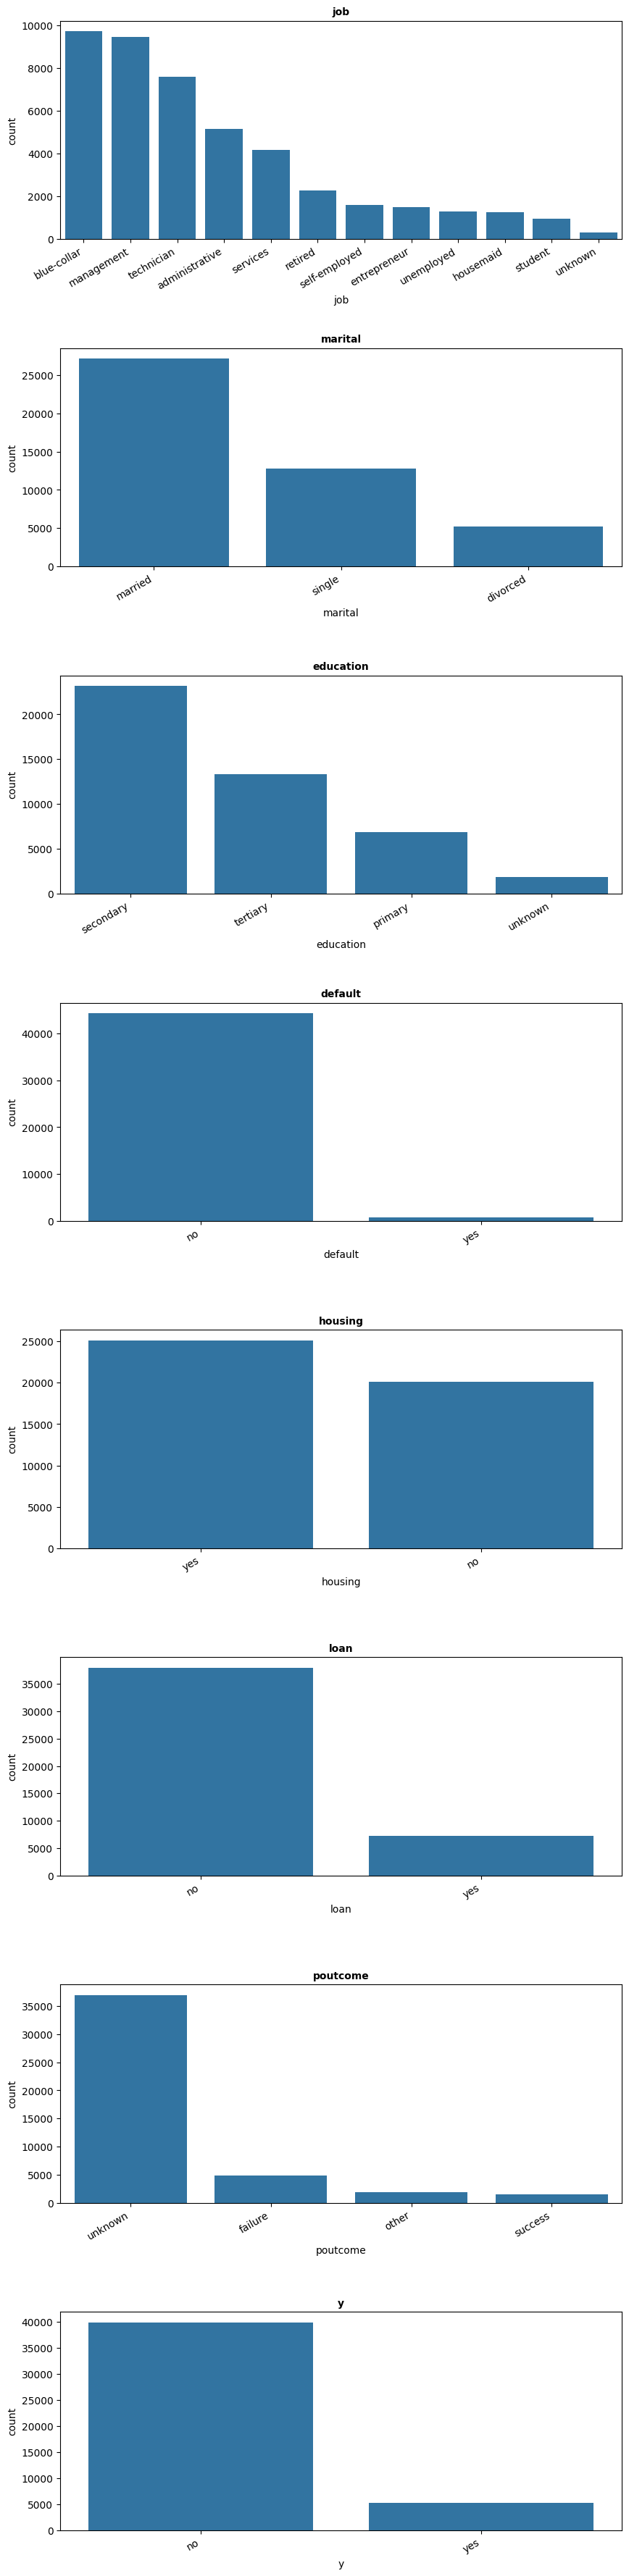

In [ ]:
# Define the list of categorical columns to visualize
categorical_columns =['job','marital','education','default','housing','loan','poutcome','y']

# Create a figure with vertically stacked subplots and set the overall figure size
fig, ax = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10,45))

# Adjust vertical spacing between subplots to prevent overlap
fig.subplots_adjust(hspace=0.5)

# Loop through each numerical column and plot a countplot in its corresponding subplot.
for i, column in enumerate(categorical_columns):
  sns.countplot(x=column, data=bank_data, ax= ax[i], order=bank_data[column].value_counts().index)

  # Set the title of each subplot using the column name
  ax[i].set_title((column), fontsize=10, fontweight='bold')

  # Rotate x-axis labels by 30 degrees for better readability
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')

* **Obtain the basic statistical values for the numeric variables**

In [ ]:
bank_data.describe()

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


Observation:
*  75% of the potential customers who were contacted have balances of less than 1,500 euros.

*   **Generate a histogram of the numeric variables**

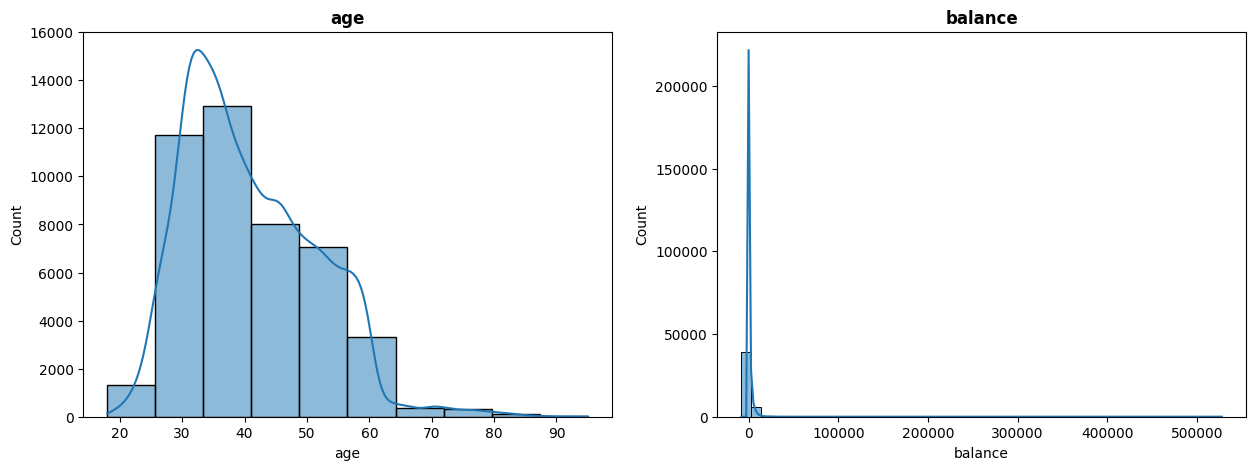

In [ ]:
# Define the list of numerical columns to visualize
numerical_columns =['age','balance']

# Create a figure with two subplots arranged in one row
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Loop through each numerical column to create a histogram
for i, column in enumerate(numerical_columns):
  # Set the number of bins depending on the column
  if column=='age':
    nbins=10
  else:
    nbins=50
  # Plot histogram with kernel density estimate (KDE) for smoother visualization
  sns.histplot(x=column, data=bank_data, ax= ax[i], bins=nbins, kde= True)
  # Set the title of each subplot using the column name
  ax[i].set_title((column), fontsize=12, fontweight='bold')




Observations:
*   Most of the potential customers who were contacted are between 25 and 50 years old, with a larger percentage in the 25-40 age range.

**5.2 Univariate Analysis**

*  **Convert the categorical column "y" into a numeric variable (y_bin) to simplify the calculation of the conversion rate**


In [ ]:
# Define a dictionary that converts categorical values to a binary format where "no"= 0 and "yes"=1
dictionary = {'no':0,'yes':1}
# Map the 'y' column using the dictionary to create a binary variable
binary= bank_data['y'].map(dictionary)
#Add the binary variable with the name "y_bin" to the data frame.
bank_data['y_bin']=binary



*   **Analyze the relationship between each numerical variable (age and balance) and the predictive variable (y_bin)**


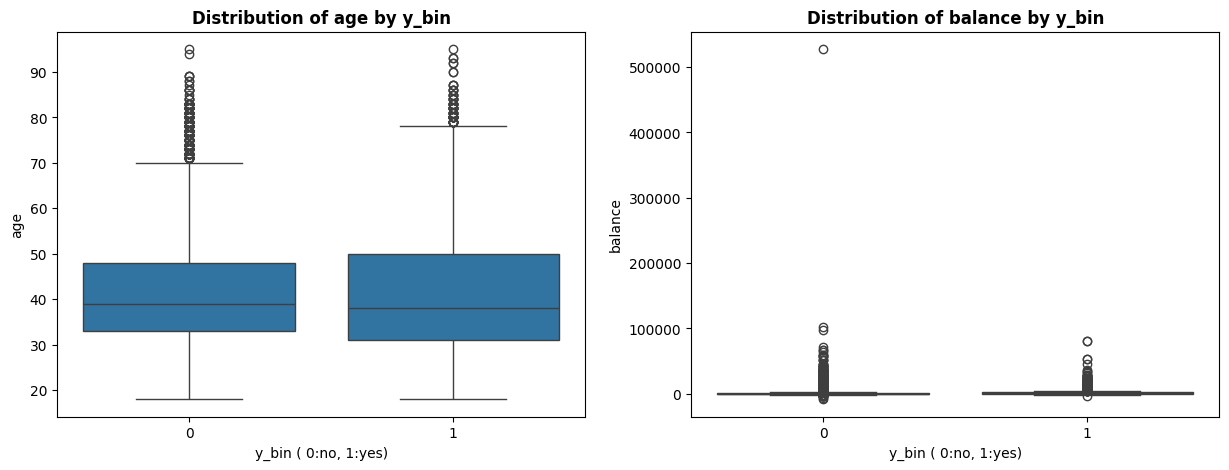

In [ ]:
# Create a figure with two subplots to compare distributions
fig, ax = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15,5))

# Loop through each numerical column and generate a boxplot using the "y_bin" variable.
for i, column in enumerate(numerical_columns):
  # Draw a boxplot showing the distribution of the current variable split by 'y_bin'
  bplt= sns.boxplot(x='y_bin', y=column, data=bank_data, ax= ax[i])
  # Set a label for the x-axis to indicate binary classification
  ax[i].set_xlabel('y_bin ( 0:no, 1:yes)')
  #Add a descriptive title for each subplot
  ax[i].set_title((f'Distribution of {column} by y_bin'), fontsize=12, fontweight='bold')

Observations:

* In the "age" and "balances" variables, no differences are observed between people who purchased the product and those who did not.
* In principle, the numerical variables "age" and "balance" don't seem to be predictive. However, these variables fall within a wide range.
* First, calculate the conversion rates by defining intervals for the numerical variables "age" and "balance." Then, determine if this analysis can provide relevant information.

*   **Define a function that displays the conversion rate for each variable in the dataframe**

In [ ]:
# Define a reusable function to visualize conversion rates based on a selected predictor variable.
def graph_conversion_rates(predictor_var, product_purchase, typen='line', order=None):

    # Extract column names from the input series to use in grouping and labeling
    x_col = predictor_var.name
    y_col = product_purchase.name

    # Group the dataset by the predictor variable and calculate the mean conversion rate
    # Multiply by 100 to express the rate as a percentage
    # Rename the resulting column
    group = bank_data.groupby(x_col)[y_col].mean().mul(100).rename('purchase_conversion_rate').reset_index()

    # Define the dimensions of the plot
    plt.figure(figsize=(10,6))

    # Generate a line plot for continuous variables
    if typen == 'line':
        sns.lineplot(x=x_col, y='purchase_conversion_rate', data=group)
    # Generate a bar plot, used when data is categorical or divided into ranges
    elif typen == 'bar':
        ax = sns.barplot(x=x_col, y='purchase_conversion_rate', data=group, order=order)
        # Add value labels on top of each bar
        for container in ax.containers:
           ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)
    # Generate a scatter plot to explore the relationship between two variables
    elif typen == 'scatter':
        sns.scatterplot(x=x_col, y='purchase_conversion_rate', data=group)

    # Customize plot aesthetics: title, axis labels, grid, and layout
    plt.title(f"Conversion Rate by {x_col}")
    plt.xlabel(x_col)
    plt.ylabel("Conversion Rate (%)")
    plt.grid()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

*   **Conversion rate graph for the age variable**

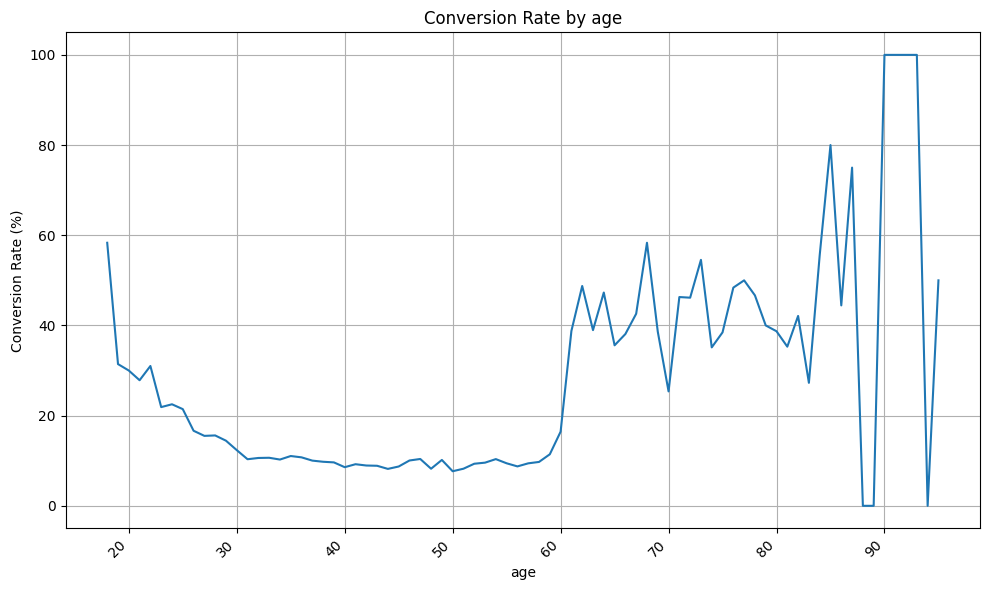

In [ ]:
#Plot the conversion rate by age.
graph_conversion_rates(bank_data['age'], bank_data['y_bin'])

Observations:
*  The line graph illustrates the differences in conversion rates by age.
*  Three age ranges can be identified: 1) 18–25 years old, 2) 26–60 years old, and 3) 61 years old and older.





*  **Create the "age_groups" column and generate three age subgroups. Then, calculate the conversion rate for each subgroup.**

In [ ]:
# Create 'age_groups' column and assign age groups based on age ranges
bank_data.loc[(bank_data['age'] >= 18) & (bank_data['age'] <= 25), 'age_groups'] = '18-25'
bank_data.loc[(bank_data['age'] > 25) & (bank_data['age'] <= 60), 'age_groups'] = '26-60'
bank_data.loc[bank_data['age'] > 60, 'age_groups'] = '>60'

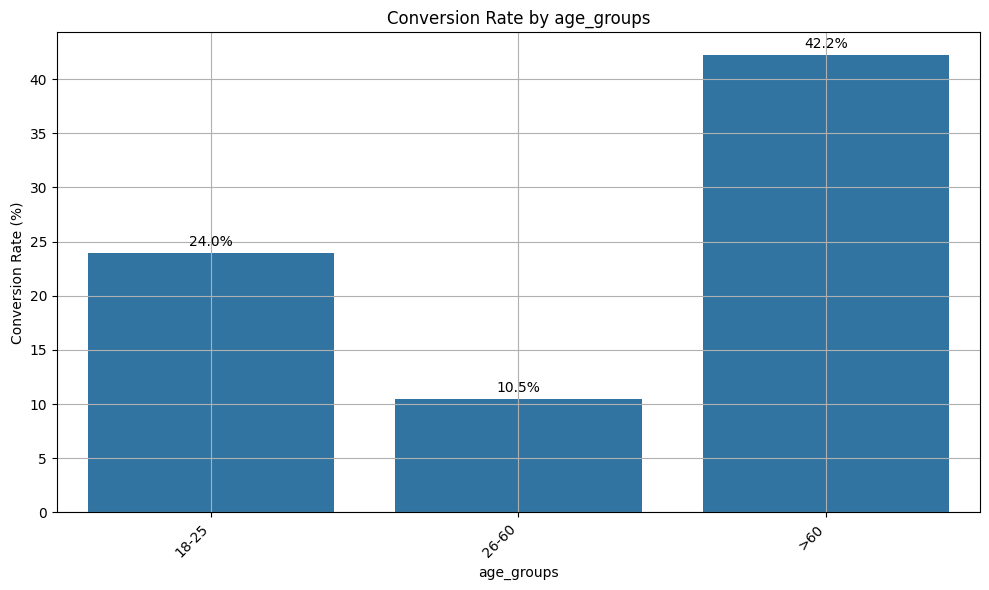

In [ ]:
#Plot the conversion rate by age range
graph_conversion_rates(bank_data['age_groups'], bank_data['y_bin'], typen='bar')

Observations:

*   There are three distinct age ranges with different conversion rates:

  *   18-25 years: 24%
  *   26-60 years: 10.5%
  *   over 60 years: 42.2%.

*   Continue the analysis using the age ranges stored in the age_groups variable, and then delete the age variable.




*   **Eliminate the "Age" column**

In [ ]:
bank_data.drop(columns=['age'], inplace=True)

*  **Conversion rate graph for the balance variable**

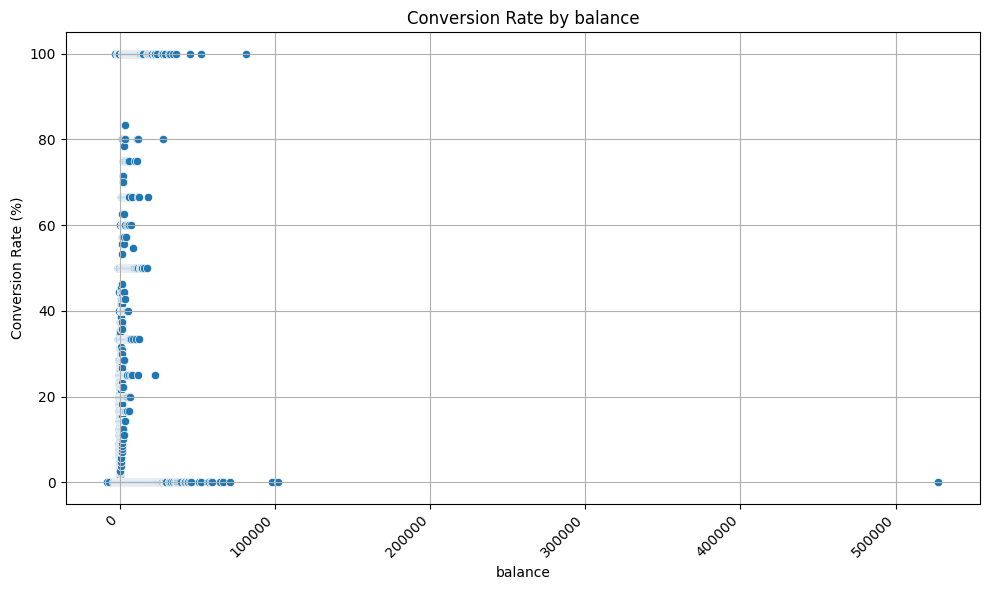

In [ ]:
#Plot the conversion rate by balance.
graph_conversion_rates(bank_data['balance'], bank_data['y_bin'], typen='scatter')

Observations:

*   This scatter plot is difficult to analyze
*   Ranges will be generated for the balance variable in the same way as for the age variable.

*   **Create the "balance_groups" column and generate seven balance subgroups. Then, calculate the conversion rate for each range.**


In [ ]:
# Create 'balance_groups' column and assign balance groups based on balance ranges
bank_data.loc[:, 'balance_groups'] = '<0'
bank_data.loc[(bank_data['balance'] >= 0) & (bank_data['balance'] < 4000), 'balance_groups'] = '0 - 4K'
bank_data.loc[(bank_data['balance'] >= 4000) & (bank_data['balance'] < 8000), 'balance_groups'] = '4K - 8K'
bank_data.loc[(bank_data['balance'] >= 8000) & (bank_data['balance'] < 12000), 'balance_groups'] = '8K - 12K'
bank_data.loc[(bank_data['balance'] >= 12000) & (bank_data['balance'] < 16000), 'balance_groups'] = '12K - 16K'
bank_data.loc[(bank_data['balance'] >= 16000) & (bank_data['balance'] < 20000), 'balance_groups'] = '16K - 20K'
bank_data.loc[bank_data['balance'] > 20000, 'balance_groups'] = '>20K'

*   **Conversion rate graph for the balance  range**

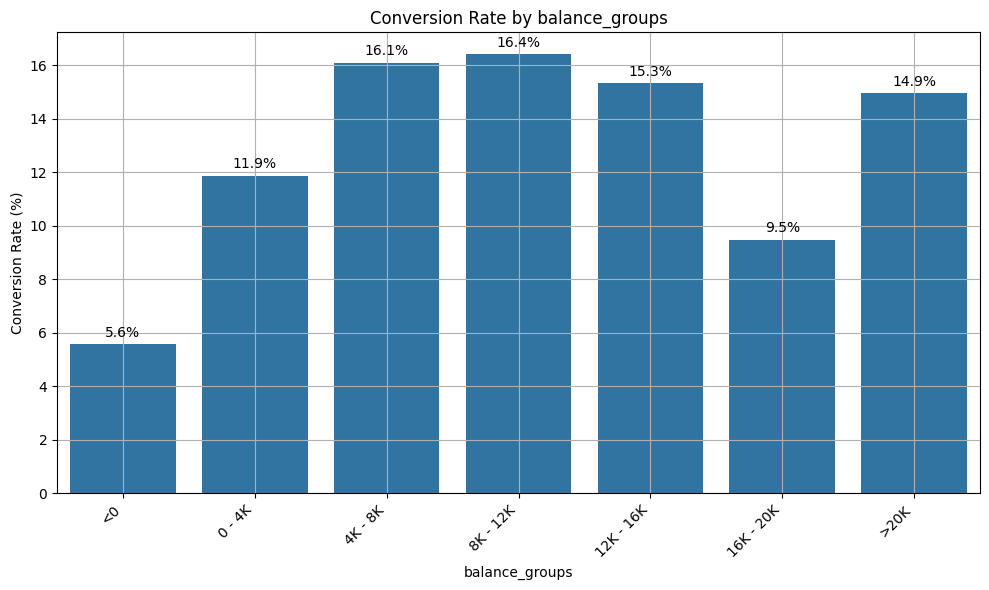

In [ ]:
#Plot the conversion rate by balance range.
order=['<0', '0 - 4K', '4K - 8K', '8K - 12K', '12K - 16K', '16K - 20K', '>20K']
graph_conversion_rates(bank_data['balance_groups'], bank_data['y_bin'], typen='bar', order=order)

Observations:


*   In general, a higher liquidity level results in a higher conversion rate. However, the 16K-20K balance range is an exception.
*   When organizing the balance ranges, the following can be observed:

  *  Less than 0:5-6%
  *   0 - 4K: 11.9%
  *   4K - 8K: 16.1%
  *   8K - 12K: 16.4%
  *   12K - 16K: 15.3%
  *   16K - 20K: 9.5%
  *  Greater than 20K : 14.9%


*   To simplify the analysis, five balance ranges can be defined.

  *  Less than 0:6%
  *   0 - 4K
  *   4K - 16K
  *   16K - 20K
  *  Greater than 20K






In [ ]:
# Generate five subgroups in the balance_groups column
bank_data.loc[:, 'balance_groups'] = '<0'
bank_data.loc[(bank_data['balance'] >= 0) & (bank_data['balance'] < 4000), 'balance_groups'] = '0 - 4K'
bank_data.loc[(bank_data['balance'] >= 4000) & (bank_data['balance'] < 16000), 'balance_groups'] = '4K - 16K'
bank_data.loc[(bank_data['balance'] >= 16000) & (bank_data['balance'] < 20000), 'balance_groups'] = '16K - 20K'
bank_data.loc[bank_data['balance'] > 20000, 'balance_groups'] = '>20K'

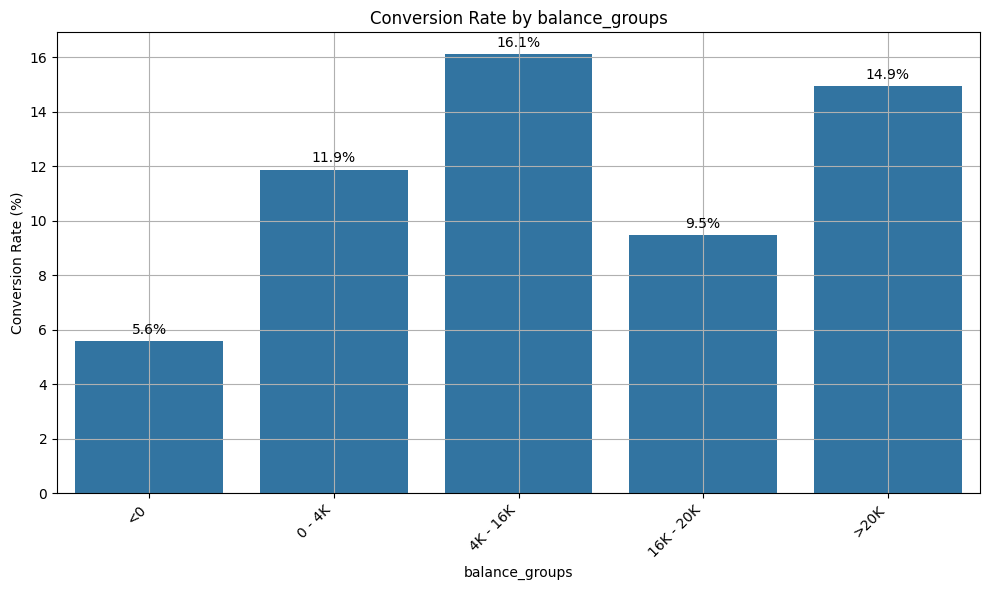

In [ ]:
#Plot the conversion rate by balance range.
order=['<0', '0 - 4K', '4K - 16K', '16K - 20K', '>20K']
graph_conversion_rates(bank_data['balance_groups'], bank_data['y_bin'], typen='bar', order=order)

Observations:
*   People with balances between 4K - 6K as well as those with balances greater than 20K, have a higher conversion rate potential.
*   People with negative balances or balances between 16K - 20K have the lowest conversion rate potential.
*   Continue the analysis using the age ranges stored in the balance_groups variable, and then delete the age variable.


*   **Eliminate the "balance" column**

In [ ]:
bank_data.drop(columns=['balance'], inplace=True)

In [ ]:
bank_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome',
       'y', 'y_bin', 'age_groups', 'balance_groups'],
      dtype='object')

*   **Analyze the relationship between the categorical variables (job, marital, education, default, housing, loan, poutcome) and the predictive variable (y_bin**)

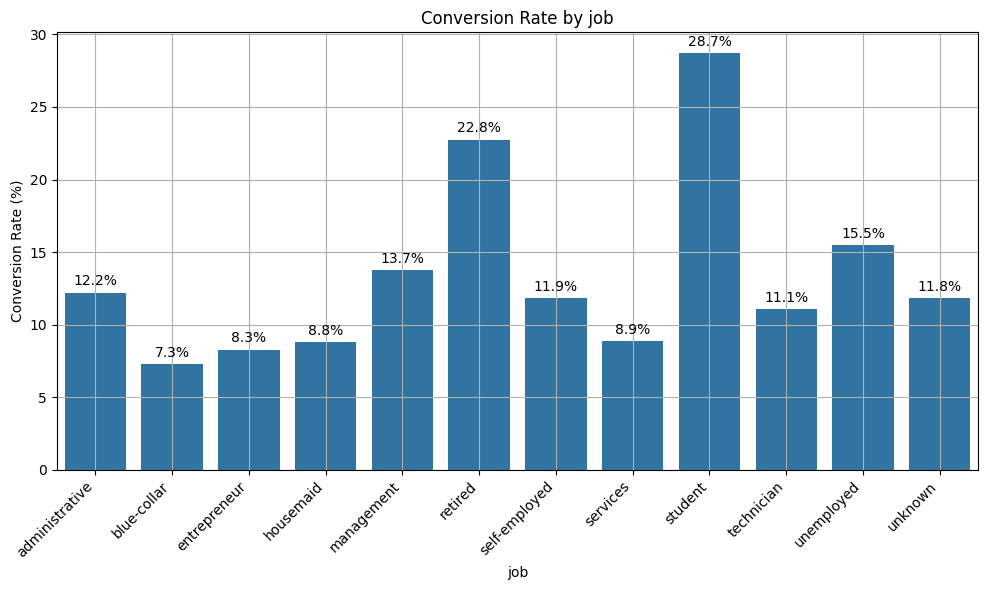

In [ ]:
#Plot the conversion rate by job.
graph_conversion_rates(bank_data['job'], bank_data['y_bin'], typen='bar')

Observations:

*   Conversion rates range from 7% to 28%.
*   The "retired" and "student" job types have the highest conversion rates, at 23% and 28%, respectively.
*   "job" could be a predictor variable.





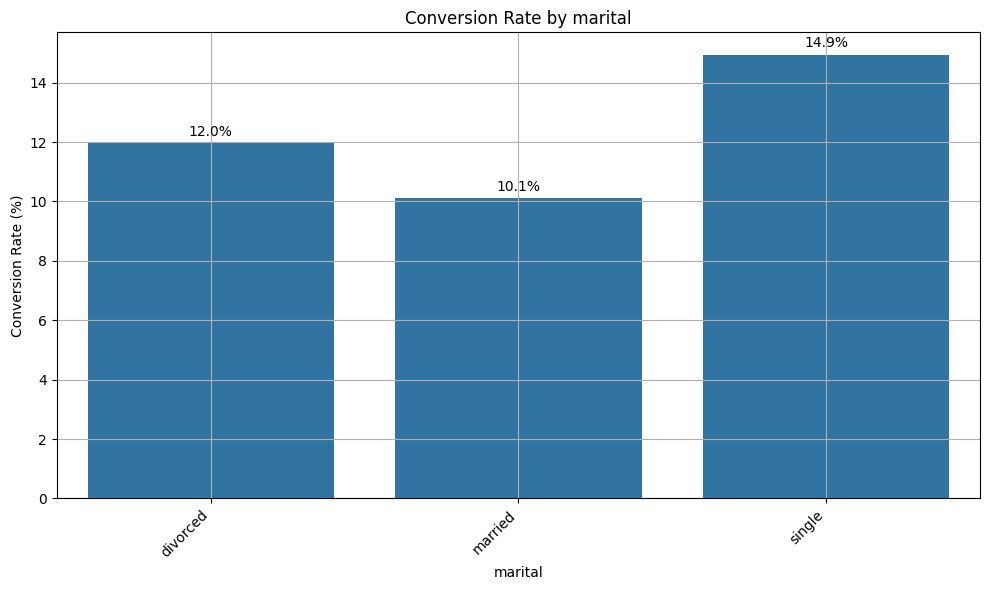

In [ ]:
#Plot the conversion rate by marital
graph_conversion_rates(bank_data['marital'], bank_data['y_bin'], typen='bar')

Observations:
*   Conversion rates are similar across all levels of marital statuses.
*   The "marital" variable does not appear to be a predictor variable.

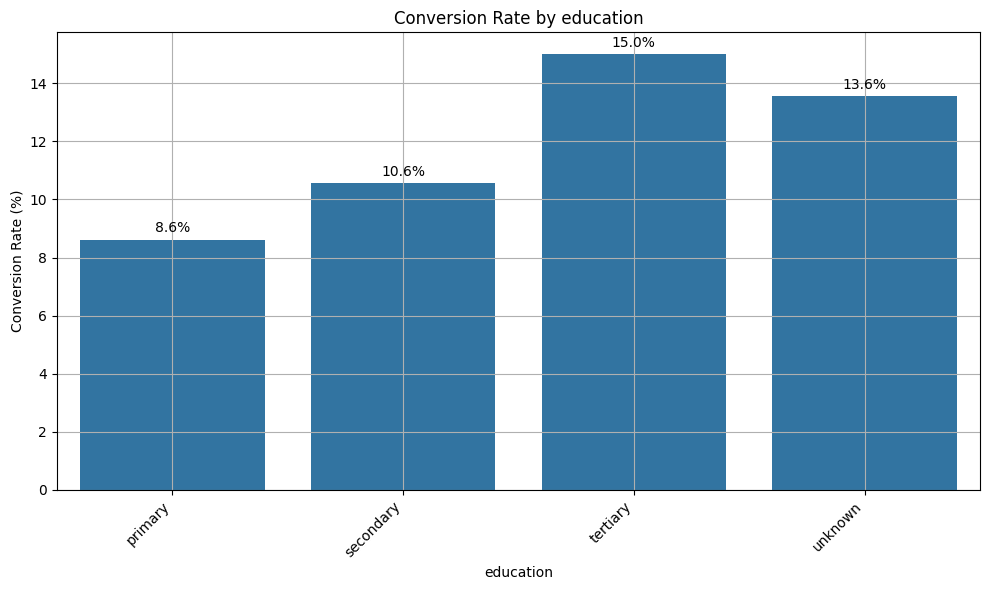

In [ ]:
#Plot the conversion rate by education
graph_conversion_rates(bank_data['education'], bank_data['y_bin'], typen='bar')

Observations:
*   The conversion rate increases slightly with higher educational levels.
*   "education" could be a predictor variable.

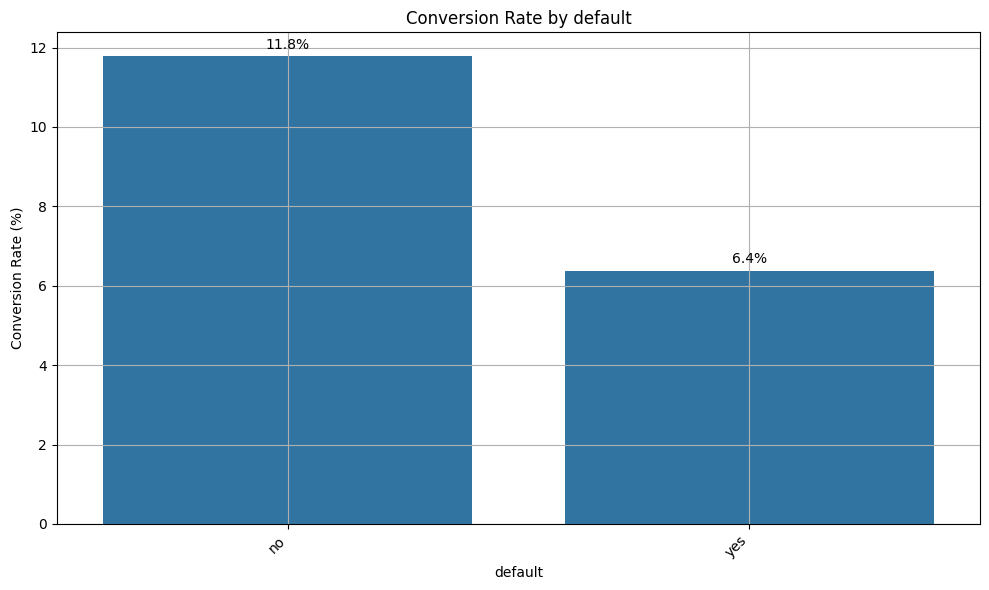

In [ ]:
#Plot the conversion rate by default.
graph_conversion_rates(bank_data['default'], bank_data['y_bin'], typen='bar')

Observations

*   The conversion rate for customers who pay their obligations ("default" = no) is approximately 12%, which is almost double the conversion rate for customers who do not pay their obligations ("default" = yes).
*   "default" could be a predictor variable



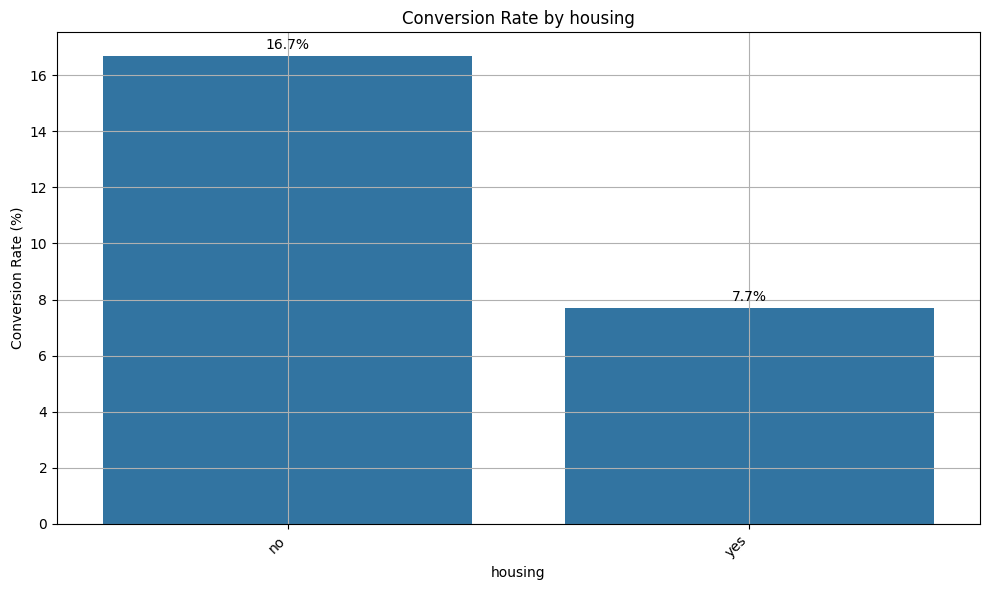

In [ ]:
#Plot the conversion rate by housing.
graph_conversion_rates(bank_data['housing'], bank_data['y_bin'], typen='bar')

Observations
*   The conversion rate for people without a mortgage is about 17%, which is more than double the rate for customers with a mortgage (around 8%).
* "housing" could be a predictor variable

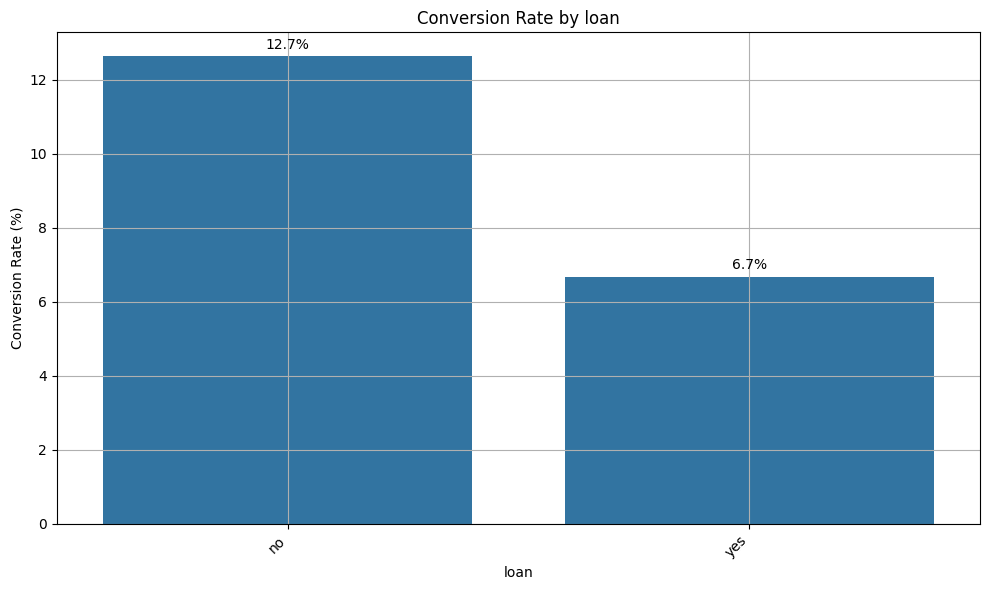

In [ ]:
#Plot the conversion rate by loan.
graph_conversion_rates(bank_data['loan'], bank_data['y_bin'], typen='bar')

Observations
*   The "loan" variable is similar to the "housing" variable. The conversion rate for people without a loan is about 13%, which is roughly double the rate for customers with one.
* "loan" could be a predictor variable

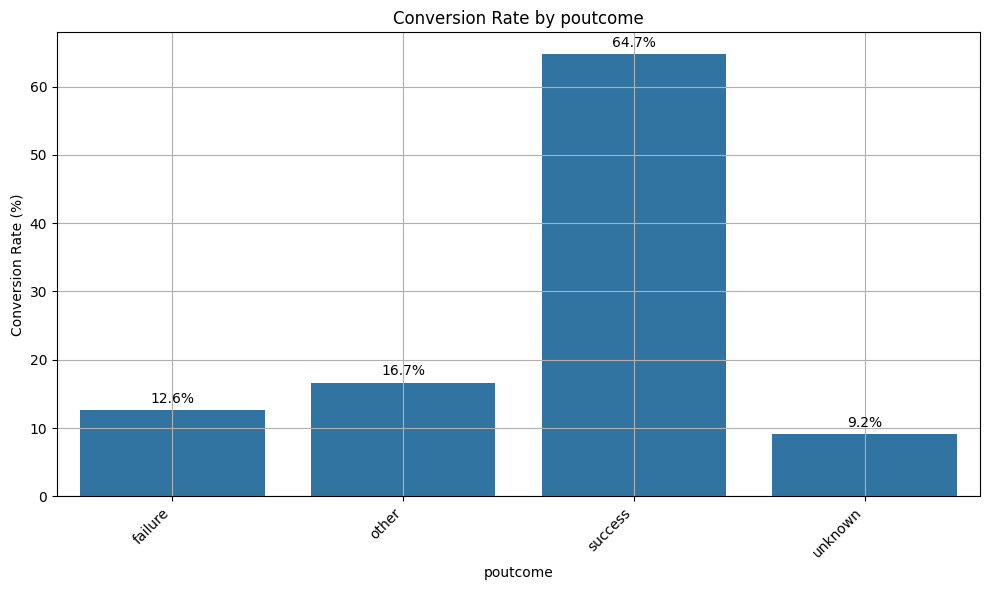

In [ ]:
#Plot the conversion rate by poutcome.
graph_conversion_rates(bank_data['poutcome'], bank_data['y_bin'], typen='bar')

Observations:
*   People who purchased a product in the previous campaign (poutcome="success") are more likely to purchase a new product from the bank.
*   "poutcome" is definitely a predictor variable.

**Conclusions of the Univariate Analysis:**

The predictor variables that appear to have the greatest impact on the conversion rate, in order of importance, are as follows:

1.   **"poutcome"**: An almost 70% conversion rate for the "success" level.
2.   **"job"**: Conversion rates of 22% and 28% for "retired" and "student".
3.   **"balance_groups"** and "age_groups": Conversion rates are close to 16% for various ranges.
4.   **"default"**, **"housing"** and **"loan"**: Conversion rates range from 12% to 16% for the "no" levels.
5.   **"marital"** and **"education"**: These have conversion rates comparable to "default," "housing," and "loan."

**5.3 Bivariate analysis**

*  **Graph the conversion rate for each combination of the two categorical variables**

In [ ]:
# Define the function
def graph_bivariate_conversion_rate(column_list, order=None):
    # Group the dataset by the two selected categorical columns
    # and calculate the mean conversion rate ('y_bin') for each combination
    conversion_rate = bank_data.groupby(column_list)['y_bin'].mean().to_frame().reset_index()
    # Set the figure size to ensure readability
    plt.figure(figsize=(13,7))
    # Create a point plot to visualize conversion rates across two categorical variables
    ax=sns.pointplot(x=conversion_rate['y_bin'], y=conversion_rate[column_list[0]], hue=conversion_rate[column_list[1]], join=False)
    # Add grid lines to both axes for better readability
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    # Set the plot title dynamically based on the selected columns
    plt.title(f"Conversion rate for {column_list[0]} and {column_list[1]}")
    # Label x-axis
    plt.xlabel("Conversion Rate")
    # Limit the x-axis to the range [0, 1] to reflect percentage values
    plt.xlim((0,1));


* **Graph the conversion rate for each combination of the two categorical variables**

/tmp/ipython-input-3465772210.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax=sns.pointplot(x=conversion_rate['y_bin'], y=conversion_rate[column_list[0]], hue=conversion_rate[column_list[1]], join=False)


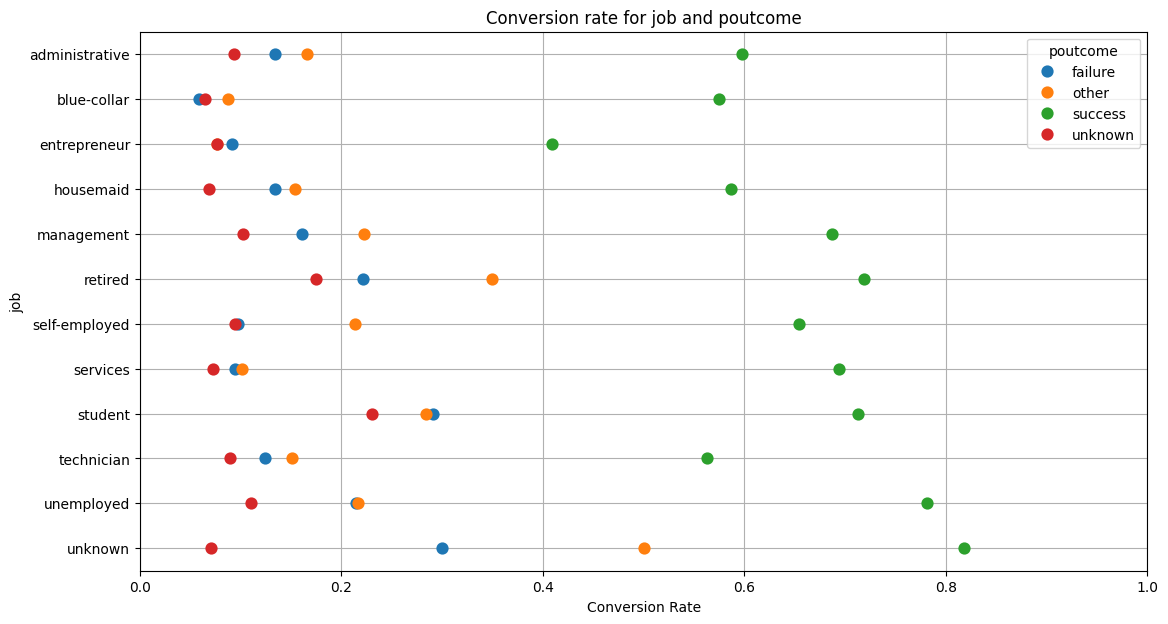

In [ ]:
#Graph the conversion rate for "job" and "poutcome"
graph_bivariate_conversion_rate(['job','poutcome'])

Observations:

*  **Conversion rates are over 60%.**

"poutcome" = success and "job" = unemployed (78%), retired and student (72%), services(70%), management (68%), self-employed (65%).



/tmp/ipython-input-3465772210.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax=sns.pointplot(x=conversion_rate['y_bin'], y=conversion_rate[column_list[0]], hue=conversion_rate[column_list[1]], join=False)


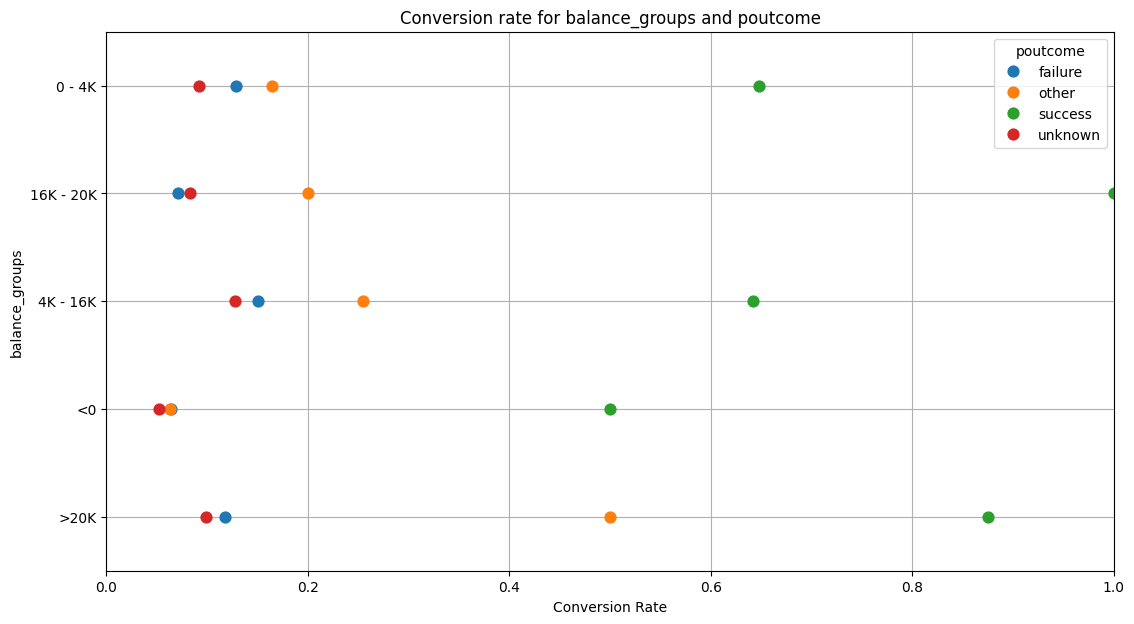

In [ ]:
#Graph the conversion rate for "balance_groups" and "poutcome"
graph_bivariate_conversion_rate(['balance_groups','poutcome'])

Observations:


*   **Conversion rates are over 60%.**

"poutcome" = success and "group_balances" = 16K-20K (100%), >20K (88%) and 0K-16K (65%)


/tmp/ipython-input-3465772210.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax=sns.pointplot(x=conversion_rate['y_bin'], y=conversion_rate[column_list[0]], hue=conversion_rate[column_list[1]], join=False)


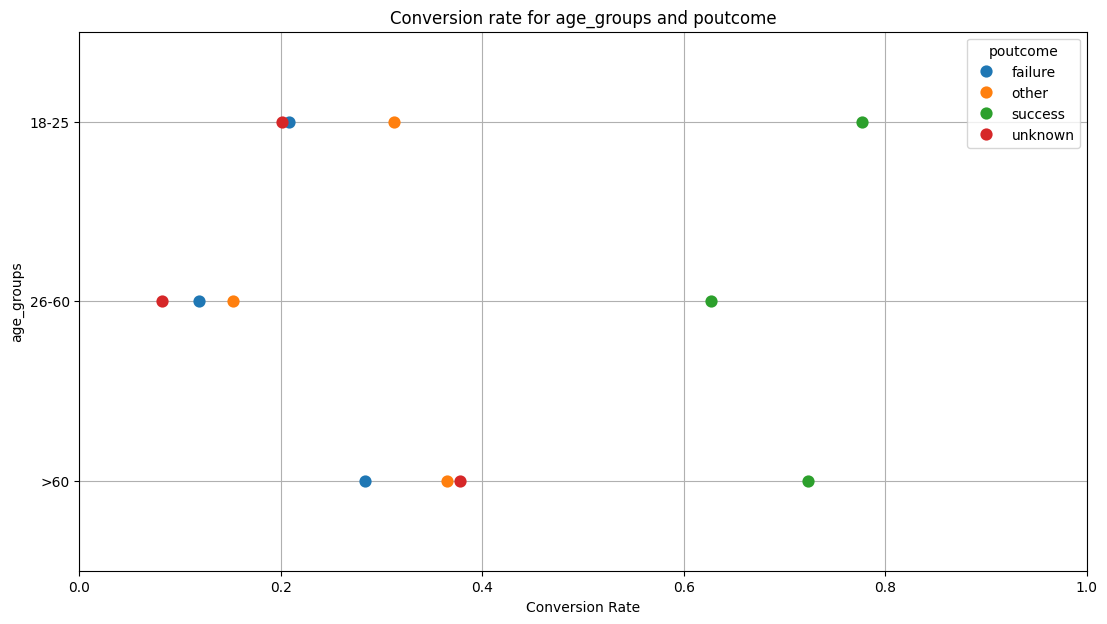

In [ ]:
#Graph the conversion rate for "age_groups" and "poutcome"
graph_bivariate_conversion_rate(['age_groups','poutcome'])

Observations:

**Conversion rates are over 60%.**

 "poutcome" = success and "age_balances" = 18-25 (78%),   >60 (72%) and 26-60 (62%)

/tmp/ipython-input-3465772210.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax=sns.pointplot(x=conversion_rate['y_bin'], y=conversion_rate[column_list[0]], hue=conversion_rate[column_list[1]], join=False)


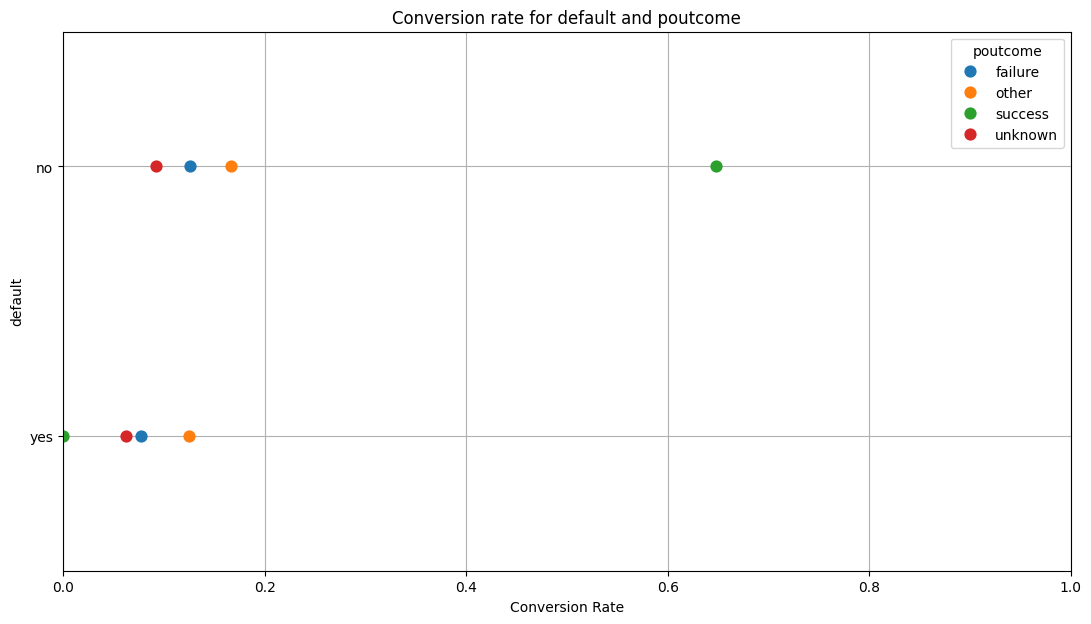

In [ ]:
#Graph the conversion rate for "default" and "poutcome"
graph_bivariate_conversion_rate(['default','poutcome'])

Observations:

**Conversion rates are over 60%.**

 "poutcome" = success and "default" = no

/tmp/ipython-input-3465772210.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax=sns.pointplot(x=conversion_rate['y_bin'], y=conversion_rate[column_list[0]], hue=conversion_rate[column_list[1]], join=False)


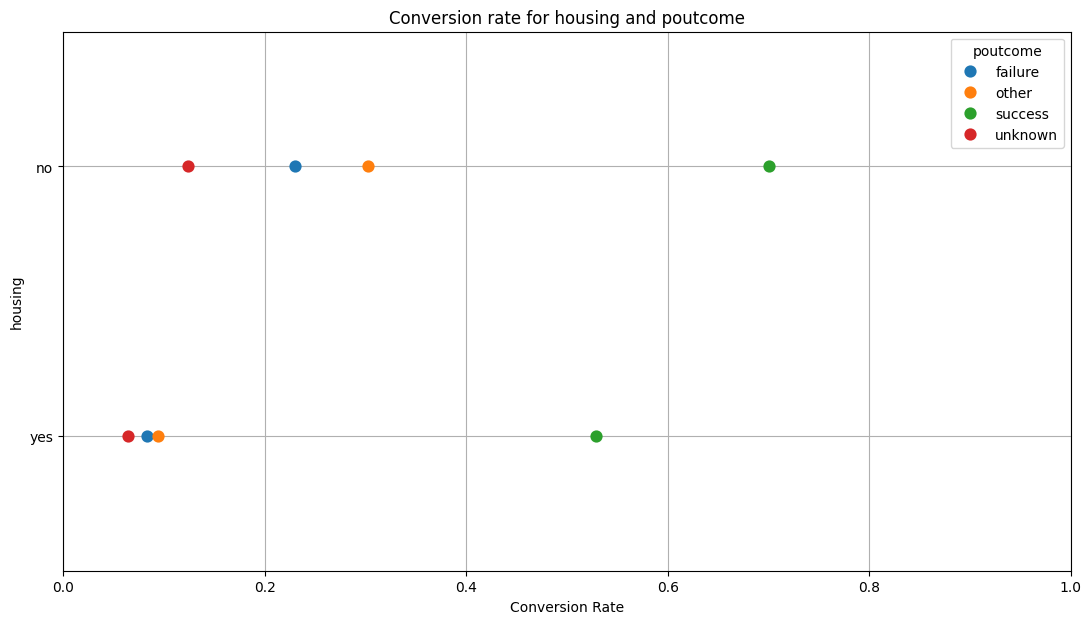

In [ ]:
#Graph the conversion rate for "housing" and "poutcome"
graph_bivariate_conversion_rate(['housing','poutcome'])

Observations:

**Conversion rates close to 70%.**

"poutcome" = success and "housing" = no

/tmp/ipython-input-3465772210.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax=sns.pointplot(x=conversion_rate['y_bin'], y=conversion_rate[column_list[0]], hue=conversion_rate[column_list[1]], join=False)


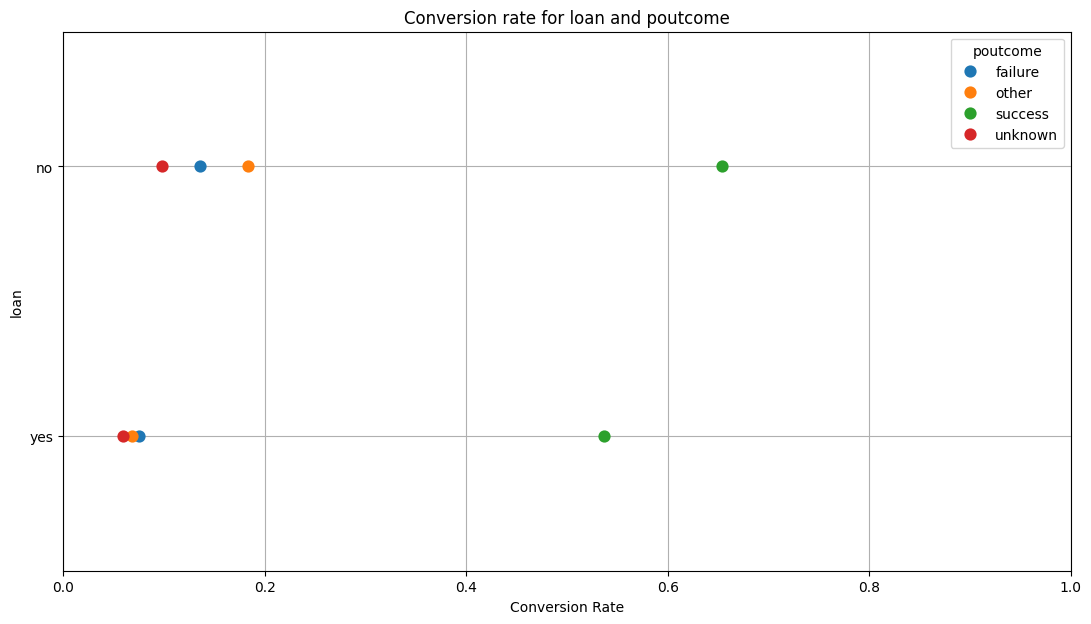

In [ ]:
#Graph the conversion rate for "loan" and "poutcome"
graph_bivariate_conversion_rate(['loan','poutcome'])

Observations:

**Conversion rates are over 60%.**

"poutcome" = success and "loan" = no

/tmp/ipython-input-3465772210.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax=sns.pointplot(x=conversion_rate['y_bin'], y=conversion_rate[column_list[0]], hue=conversion_rate[column_list[1]], join=False)


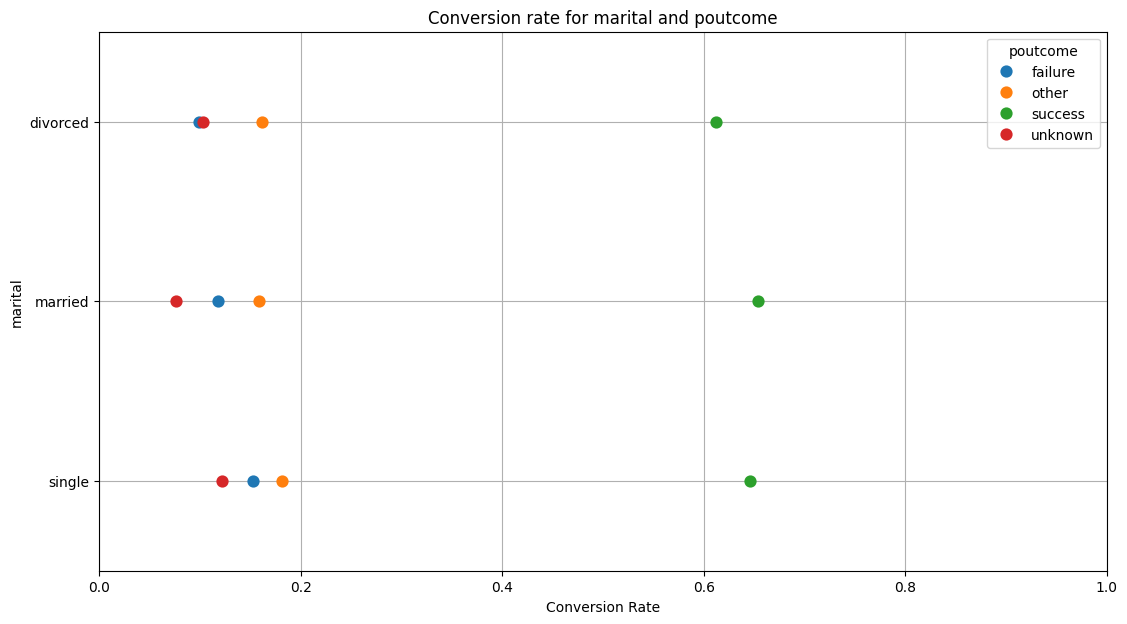

In [ ]:
#Graph the conversion rate for "marital" and "poutcome"
graph_bivariate_conversion_rate(['marital','poutcome'])

Observations:

**Conversion rates are over 60%.**

"poutcome" = success and all levels of marital status.

/tmp/ipython-input-3465772210.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax=sns.pointplot(x=conversion_rate['y_bin'], y=conversion_rate[column_list[0]], hue=conversion_rate[column_list[1]], join=False)


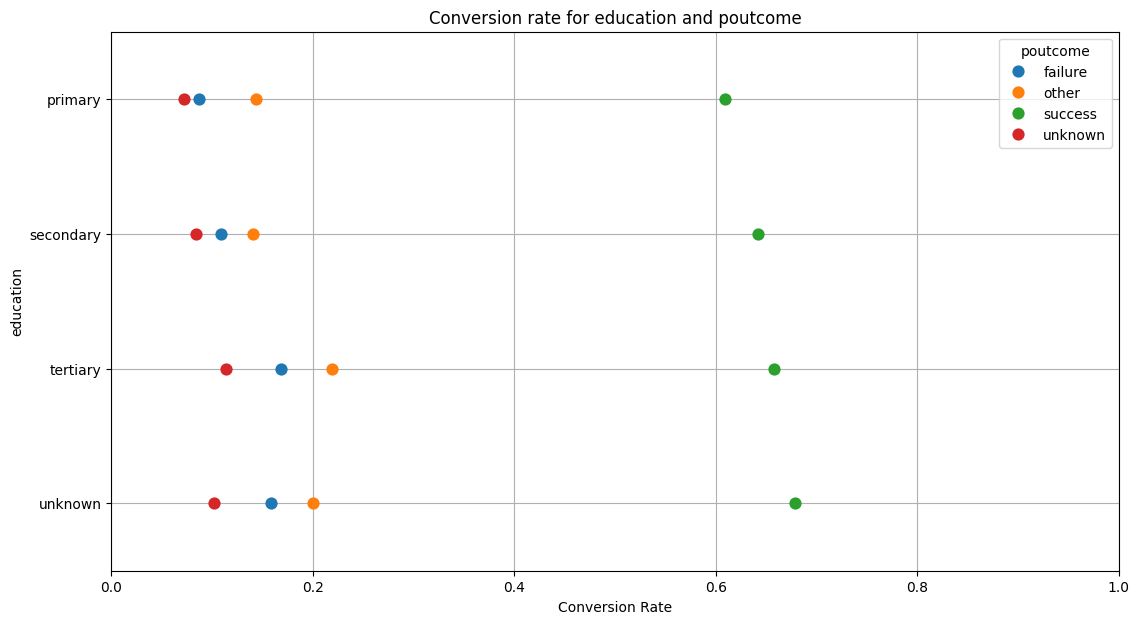

In [ ]:
#Graph the conversion rate for "education" and "poutcome"
graph_bivariate_conversion_rate(['education','poutcome'])

Observations:

**Conversion rates are over 60%.**

"poutcome" = success and all levels of education (primary, secondary, tertiary and unknown).

**Conclusions of the Bivariate Analysis:**

*   The variables "poutcome", "job", "balance_groups", and "age_groups" have the greatest impact on the conversion rate.

*   Based on this analysis, the ideal customer profile for acquiring the bank's new product is as follows:

    *  **"poutcome"**= success. The person must have been contacted by the bank previously and must have purchased the product in the last campaign.
    *   **"job"** = Type of Job (Top 3): Unemployed, student and retired.
    *   **"balance"** = Between 16000 euros and 20000 euros, preferably.
    *  **"age"** =  Between 18 and 25 years old, preferably.
    *  **"default"** = no (if the person has a loan and is meeting their bank obligations), **"loan"** = no (if the person doesn't have a loan), and **"housing"** = no (if the person doesn't have a mortgage loan).

**Step to follow:**

* Create a machine learning model that considers combinations of multiple variables and ranks those with the greatest potential for conversion. This allows us to define the customer segment willing to acquire the bank's new product differently.